In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy.stats import norm
from scipy.stats import shapiro

%matplotlib inline

In [2]:
data = pd.read_csv('data/000300.csv')

Code below is Libaraies we will use

In [3]:
def rolling(data, days = 20, interval = 1):
    start, end = 0, len(data)
    while(start + 2 * days <= end):
        yield data[start : start + days], data[start + days : start + 2 * days]
        start += interval
def rolling1(data, idx_from, idx_to, col_list):
    if idx_to >= len(data): return None
    else:
        return data[idx_from:idx_to+1][col_list]
    
def rolling2(data, idx_from, length, col_list):
    return rolling1(data, idx_from, idx_from + length - 1, col_list)

# let's verify the rolling function
for dx, dy in rolling(data, days=252, interval = 20):
    print("===============================")
    print("Training: {}, {}".format(dx.iloc[0]['datetime'], dx.iloc[-1]['datetime']))
    print("Testing:  {}, {}".format(dy.iloc[0]['datetime'], dy.iloc[-1]['datetime']))

simulate 1

In [4]:
log_return = np.log(1+data['close'].pct_change())
log_return = log_return[~np.isnan(log_return)]
ret = data['close'].pct_change()
ret = ret[~np.isnan(ret)]

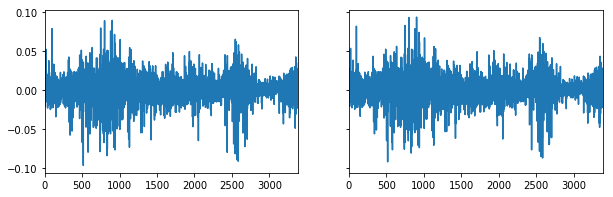

In [7]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(10,3))
log_return.plot(ax=axes[0])
ret.plot(ax=axes[1])
# axes[0].plot(log_return)
# axes[1].plot(ret)

By the code below, we can see, the pct_change doesn't follow normal distribution

P_value =  0.00
P_value =  0.00
0.0003469378192376526 0.017584296174757093
0.0005012178221610048 0.01752094984981381


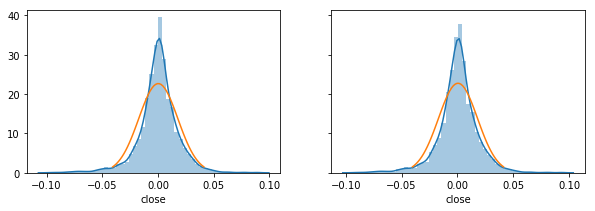

In [24]:
stat, p = shapiro(log_return)
print("P_value = %5.2f" %(p))
stat, p = shapiro(ret)
print("P_value = %5.2f" %(p))

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 3))

sns.distplot(log_return, ax=axes[0])
sns.distplot(ret, ax=axes[1])

mu= np.mean(log_return)
std = np.std(log_return)
print(mu, std)
x = np.linspace(norm.ppf(0.01, loc=mu, scale=std), norm.ppf(0.99, loc=mu, scale=std))
y = norm.pdf(x, loc=mu, scale=std)
axes[0].plot(x, y)

mu= np.mean(ret)
std = np.std(ret)
print(mu, std)
x = np.linspace(norm.ppf(0.01, loc=mu, scale=std), norm.ppf(0.99, loc=mu, scale=std))
y = norm.pdf(x, loc=mu, scale=std)
axes[1].plot(x, y)

In [11]:
mu = log_return.mean()
var = log_return.var()
std = log_return.std()

<class 'numpy.float64'> <class 'numpy.float64'> <class 'numpy.float64'>


In [16]:
drift = mu - (0.5 * var)
drift

0.00019228841007045913

norm.ppf 是 norm.cdf 的逆， 也称分位点函数

norm.ppf(0.95) 返回的是95%累计概率时对应的x的值

rand(10,2)返回一个10x2的矩阵，ppf针对每一个数据点给出分位点的数值

In [12]:
Z = norm.ppf(np.random.rand(10, 2))
Z

array([[-1.17960796,  2.37006538],
       [-0.54306296,  1.01963855],
       [ 1.54695869, -1.03424618],
       [ 0.45177762, -0.82162642],
       [-0.75565453, -0.52152916],
       [-0.30644171,  0.58078774],
       [ 1.20920257, -1.56090984],
       [ 1.47032301, -0.29284734],
       [ 0.0884517 ,  0.2289308 ],
       [ 0.46796658,  0.55302512]])

In [13]:
t_intervals = 1000 # up coming 1000 days
iterations = 10

In [ ]:
daily_returns = np.exp(drfit.values)